In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

### Preprocessing

In [2]:
hqprecip = pd.read_csv('HQprecipitation Data.csv')
hqprecip.head()

,time,HqPrecips
0,2001-01-01 00:00:00,"[1.744999885559082, 1.899999976158142, 1.55999..."
1,2001-01-02 00:00:00,"[6.5149993896484375, 3.3349997997283936, 0.779..."
2,2001-01-03 00:00:00,"[1.619999885559082, 1.125, 5.389999866485596, ..."
3,2001-01-04 00:00:00,"[3.509999990463257, 2.6349997520446777, 2.3450..."
4,2001-01-05 00:00:00,"[0.6399999856948853, 0.6349999904632568, 0.140..."


In [3]:
for i in range(3652):
    hqprecip['time'][i] = hqprecip['time'][i][:10]
hqprecip.head()

,time,HqPrecips
0,2001-01-01,"[1.744999885559082, 1.899999976158142, 1.55999..."
1,2001-01-02,"[6.5149993896484375, 3.3349997997283936, 0.779..."
2,2001-01-03,"[1.619999885559082, 1.125, 5.389999866485596, ..."
3,2001-01-04,"[3.509999990463257, 2.6349997520446777, 2.3450..."
4,2001-01-05,"[0.6399999856948853, 0.6349999904632568, 0.140..."


In [4]:
hqprecip['time'] = pd.to_datetime(hqprecip['time'], format='%Y-%m-%d')
hqprecip.head()

,time,HqPrecips
0,2001-01-01,"[1.744999885559082, 1.899999976158142, 1.55999..."
1,2001-01-02,"[6.5149993896484375, 3.3349997997283936, 0.779..."
2,2001-01-03,"[1.619999885559082, 1.125, 5.389999866485596, ..."
3,2001-01-04,"[3.509999990463257, 2.6349997520446777, 2.3450..."
4,2001-01-05,"[0.6399999856948853, 0.6349999904632568, 0.140..."


In [5]:
floods = pd.read_excel('Flood Events Final.xlsx')
floods = floods.drop(columns=['Unnamed: 0'])
floods.head()

,Date,Bernam River,Selangor River,Buloh River,Klang River,Langat River,Sepang River
0,2001-01-25,0,0,0,1,0,0
1,2001-02-19,1,0,0,0,0,0
2,2001-04-03,0,0,0,1,1,0
3,2001-04-09,0,0,0,1,1,0
4,2001-04-13,0,0,0,1,0,0


In [6]:
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2001, 1, 1)
end_date = date(2011, 1, 1)
dates = []
for single_date in daterange(start_date, end_date):
    dates.append(single_date.strftime("%Y-%m-%d"))

nonFloods = pd.DataFrame({
    'Date':dates,
    'Bernam River':0,
    'Selangor River':0,
    'Buloh River':0,
    'Klang River':0,
    'Langat River':0,
    'Sepang River':0,
})

nonFloods['Date'] = pd.to_datetime(nonFloods['Date'], format='%Y-%m-%d')
nonFloods.shape

(3652, 7)

In [7]:
floods = floods.append(nonFloods, ignore_index=True)
floods = floods.groupby(['Date']).sum().reset_index()

C:\Users\Hunts\AppData\Local\Temp\ipykernel_2108\3410022939.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  floods = floods.append(nonFloods, ignore_index=True)


In [8]:
result = []
for i in range(3652):
    if 1 in list(floods.iloc[i][1:]):
        result.append(1)
    else:
        result.append(0)

In [9]:
simpleFloods = pd.DataFrame({
    'Date':floods['Date'],
    'Flood':result
})

In [10]:
hqprecip = hqprecip.drop(columns=['time'])

In [11]:
simpleFloods = simpleFloods.drop(columns=['Date'])

In [12]:
column_list = []
for i in range(225):
    colName = 'HqPrecip_'+str(i)
    column_list.append(colName)

In [13]:
column = []
for i in range(3652):
    values = (hqprecip['HqPrecips'][i])[1:-1].split(', ')
    for j in range(225):
        values[j] = float(values[j])
    column.append(values)

In [14]:
HqSplit = pd.DataFrame(np.column_stack(list(zip(*column))), columns=column_list)

In [15]:
HqSplit.head()

,HqPrecip_0,HqPrecip_1,HqPrecip_2,HqPrecip_3,HqPrecip_4,HqPrecip_5,HqPrecip_6,HqPrecip_7,HqPrecip_8,HqPrecip_9,...,HqPrecip_215,HqPrecip_216,HqPrecip_217,HqPrecip_218,HqPrecip_219,HqPrecip_220,HqPrecip_221,HqPrecip_222,HqPrecip_223,HqPrecip_224
0,1.745000,1.900,1.560,1.845,1.575,1.770,1.150,1.090,0.750,0.640,...,0.00,0.150,0.000,0.245,0.000,0.000,0.000,0.000,0.000,0.035
1,6.514999,3.335,0.780,0.725,0.410,1.215,1.005,1.390,0.930,2.485,...,0.00,0.020,0.020,0.000,0.000,0.000,0.200,0.175,0.000,0.000
2,1.620000,1.125,5.390,6.990,5.195,3.205,3.590,2.805,2.605,2.555,...,0.27,0.265,0.265,0.265,0.530,0.375,0.315,0.625,0.345,0.265
3,3.510000,2.635,2.345,1.300,1.485,1.490,1.525,2.475,3.130,3.020,...,1.69,1.280,1.360,1.325,1.325,0.220,0.100,0.310,0.620,1.065
4,0.640000,0.635,0.140,0.195,0.225,0.240,0.240,0.540,0.545,0.880,...,0.01,0.010,0.000,0.000,0.000,0.010,0.010,0.005,0.005,0.005


In [16]:
# December 2021 test case preprocessing
dec21 = pd.read_csv('HQprecipitation Data Test Cases (Dec2021).csv')

for i in range(31):
    dec21['time'][i] = dec21['time'][i][:10]
    
dec21 = dec21.drop(columns=['time'])

column_list = []
for i in range(225):
    colName = 'HqPrecip_'+str(i)
    column_list.append(colName)
    
column = []
for i in range(31):
    values = (dec21['HqPrecips'][i])[1:-1].split(', ')
    for j in range(225):
        values[j] = float(values[j])
    column.append(values)

Dec21HqSplit = pd.DataFrame(np.column_stack(list(zip(*column))), columns=column_list)

In [17]:
# June 2021 test case preprocessing
jun21 = pd.read_csv('HQprecipitation Data Test Cases (Jun2021).csv')

for i in range(30):
    jun21['time'][i] = jun21['time'][i][:10]

jun21 = jun21.drop(columns=['time'])

column_list = []
for i in range(225):
    colName = 'HqPrecip_'+str(i)
    column_list.append(colName)
    
column = []
for i in range(30):
    values = (jun21['HqPrecips'][i])[1:-1].split(', ')
    for j in range(225):
        values[j] = float(values[j])
    column.append(values)
    
Jun21HqSplit = pd.DataFrame(np.column_stack(list(zip(*column))), columns=column_list)

### Decision Tree

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [19]:
import imblearn
oversample = imblearn.over_sampling.SMOTE()
HqSplit, simpleFloods = oversample.fit_resample(HqSplit, simpleFloods)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(HqSplit, simpleFloods, test_size=0.3, random_state=42)

In [21]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [22]:
dt_predictions = dt.predict(x_test)
cm = metrics.confusion_matrix(y_test,dt_predictions,labels=dt.classes_)

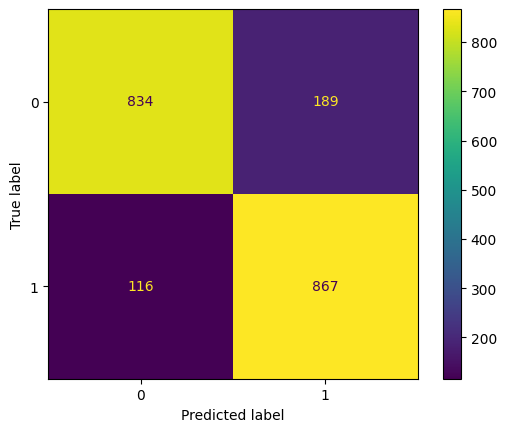

In [23]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
display.plot()
plt.show()

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, dt_predictions))
print('Precision: %.3f' % precision_score(y_test, dt_predictions))
print('Recall: %.3f' % recall_score(y_test, dt_predictions))
print('F1 Score: %.3f' % f1_score(y_test, dt_predictions))

Accuracy: 0.848
Precision: 0.821
Recall: 0.882
F1 Score: 0.850


In [25]:
dt_dec_predictions = dt.predict(Dec21HqSplit)
dt_dec_predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [26]:
dt_jun_predictions = dt.predict(Jun21HqSplit)
dt_jun_predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [27]:
import pickle
pickle.dump(dt, open('HQDtModel.pkl', 'wb'))

### Logistic Regression

In [28]:
logReg = LogisticRegression(max_iter=10000, class_weight='balanced')
logReg.fit(x_train, y_train)

C:\Users\Hunts\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=10000)

In [29]:
score = logReg.score(x_test,y_test)
print(score)

0.7123629112662014


In [30]:
predictions = logReg.predict(x_test)
cm = metrics.confusion_matrix(y_test,predictions,labels=logReg.classes_)
print(cm)

[[783 240]
 [337 646]]


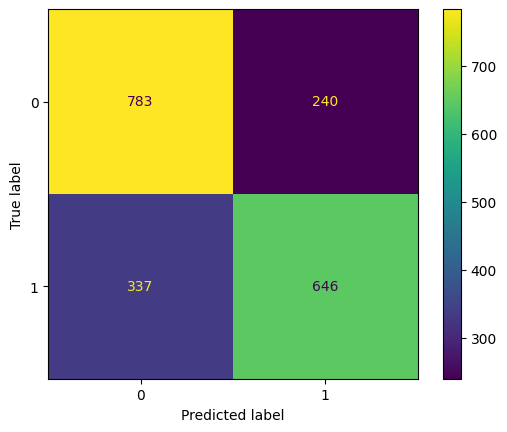

In [31]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logReg.classes_)
display.plot()
plt.show()

In [32]:
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions))

Accuracy: 0.712
Precision: 0.729
Recall: 0.657
F1 Score: 0.691


In [33]:
logreg_dec_predictions = logReg.predict(Dec21HqSplit)
logreg_dec_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
logreg_jun_predictions = logReg.predict(Jun21HqSplit)
logreg_jun_predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
pickle.dump(logReg, open('HQLogRegModel.pkl', 'wb'))

### Naive Bayes

In [36]:
bayes = GaussianNB()
bayesPredictions = bayes.fit(x_train, y_train).predict(x_test)

C:\Users\Hunts\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
cm = metrics.confusion_matrix(y_test,bayesPredictions,labels=bayes.classes_)
print(cm)

[[849 174]
 [618 365]]


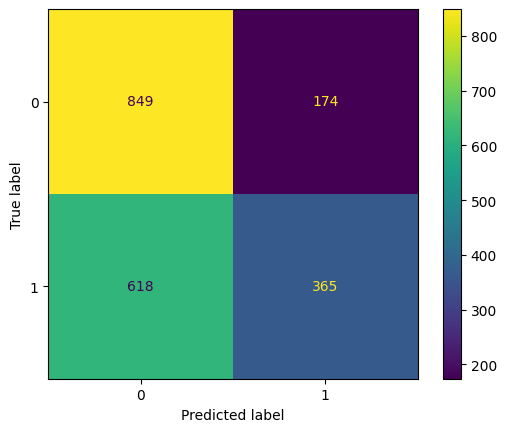

In [38]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bayes.classes_)
display.plot()
plt.show()

In [39]:
print('Accuracy: %.3f' % accuracy_score(y_test, bayesPredictions))
print('Precision: %.3f' % precision_score(y_test, bayesPredictions))
print('Recall: %.3f' % recall_score(y_test, bayesPredictions))
print('F1 Score: %.3f' % f1_score(y_test, bayesPredictions))

Accuracy: 0.605
Precision: 0.677
Recall: 0.371
F1 Score: 0.480


In [40]:
bayes_dec_predictions = bayes.predict(Dec21HqSplit)
bayes_dec_predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [41]:
bayes_dec_predictions = bayes.predict(Jun21HqSplit)
bayes_dec_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
pickle.dump(bayes, open('bayesModel.pkl', 'wb'))

### Support Vector Machine

In [43]:
svmachine = svm.SVC()
svmachine.fit(x_train, y_train)

C:\Users\Hunts\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [44]:
svmachinePredictions = svmachine.predict(x_test)
cm = metrics.confusion_matrix(y_test,svmachinePredictions,labels=svmachine.classes_)
print(cm)

[[870 153]
 [189 794]]


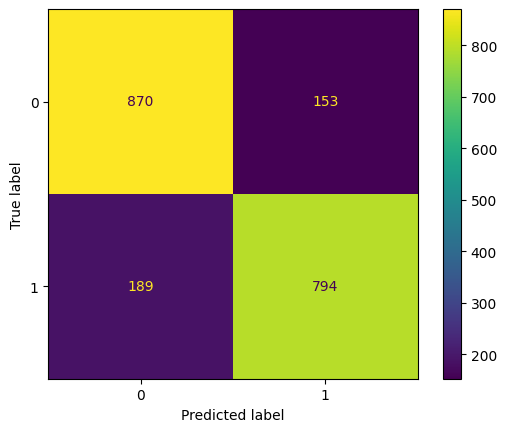

In [45]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svmachine.classes_)
display.plot()
plt.show()

In [46]:
print('Accuracy: %.3f' % accuracy_score(y_test, svmachinePredictions))
print('Precision: %.3f' % precision_score(y_test, svmachinePredictions))
print('Recall: %.3f' % recall_score(y_test, svmachinePredictions))
print('F1 Score: %.3f' % f1_score(y_test, svmachinePredictions))

Accuracy: 0.830
Precision: 0.838
Recall: 0.808
F1 Score: 0.823


In [47]:
svmachine_dec_predictions = svmachine.predict(Dec21HqSplit)
svmachine_dec_predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [48]:
svmachine_dec_predictions = svmachine.predict(Jun21HqSplit)
svmachine_dec_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [49]:
pickle.dump(svmachine, open('HQSvmachineModel.pkl', 'wb'))